              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199898
           1       0.88      0.22      0.35       102

    accuracy                           1.00    200000
   macro avg       0.94      0.61      0.67    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199895      3]
 [    80     22]]


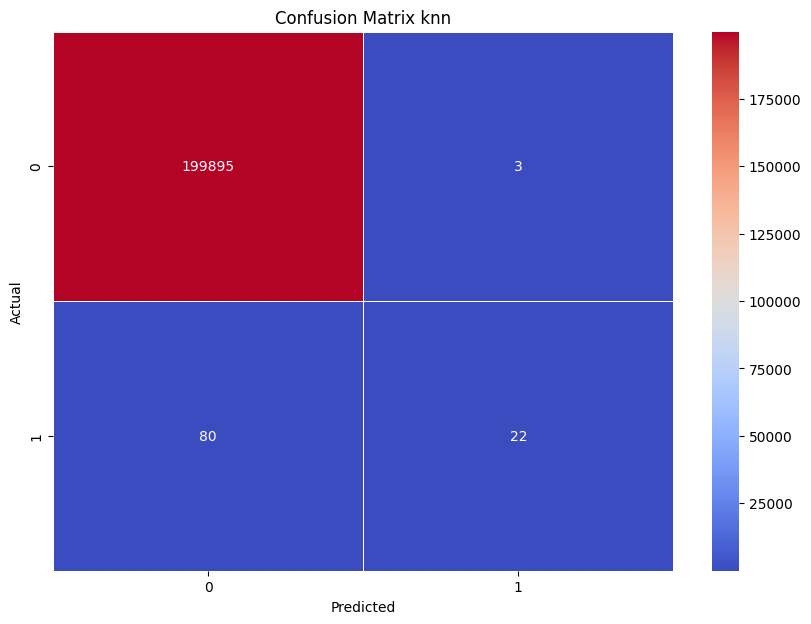

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199687
           1       0.99      0.67      0.80       313

    accuracy                           1.00    200000
   macro avg       0.99      0.83      0.90    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199684      3]
 [   104    209]]


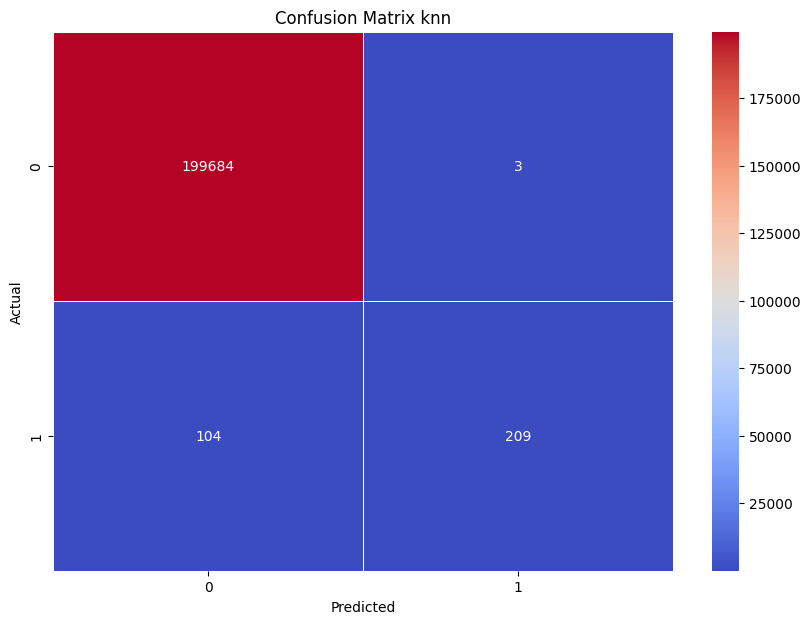

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

def process_chunks(file_path, chunk_size):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    scaler = StandardScaler()
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the KNN model
        knn_model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = knn_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Plot confusion matrix as heatmap
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix knn')
        plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 1000000  # Reduced chunk size for faster initial testing
process_chunks(file_path, chunk_size)
